# Simple Stock Signals RSI

This simple tutorial, we will add buy and sell signals for RSI.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2018-12-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,17.209681,17.667610,16.729880,17.214502,17.214502,8.460868e+07
std,6.202684,6.430476,5.912749,6.182515,6.182515,4.636185e+07
min,9.080000,9.770000,9.040000,9.530000,9.530000,2.887510e+07
25%,12.005000,12.185000,11.710000,11.955000,11.955000,4.869910e+07
50%,16.180000,16.530001,15.780000,16.270000,16.270000,7.434780e+07
75%,20.150001,20.895001,19.574999,20.149999,20.149999,1.071805e+08
max,33.180000,34.139999,32.189999,32.720001,32.720001,3.250584e+08


In [4]:
import talib as ta

In [5]:
df['RSI'] = ta.RSI(df['Adj Close'], timeperiod=14)

In [6]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2018-01-23,12.82,13.00,12.76,12.94,12.94,46417200,75.654450
2018-01-24,13.02,13.05,12.60,12.71,12.71,41956400,71.047655
2018-01-25,12.78,12.94,12.32,12.41,12.41,42966600,65.449453
2018-01-26,12.70,12.95,12.62,12.95,12.95,44239000,70.027488
2018-01-29,13.13,13.47,13.05,13.32,13.32,66645400,72.696974


In [7]:
df['Positions'] = 0

df['Positions'] = np.select([df['RSI']<30, df['RSI']>70], [1,-1], default=0)
df['Signals'] = df['Positions'].diff()

In [8]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,Positions,Signals
Date,,,,,,,,,
2018-01-24,13.02,13.05,12.60,12.71,12.71,41956400,71.047655,-1,0.0
2018-01-25,12.78,12.94,12.32,12.41,12.41,42966600,65.449453,0,1.0
2018-01-26,12.70,12.95,12.62,12.95,12.95,44239000,70.027488,-1,-1.0
2018-01-29,13.13,13.47,13.05,13.32,13.32,66645400,72.696974,-1,0.0
2018-01-30,13.12,13.27,12.69,12.87,12.87,91236400,65.102501,0,1.0


In [9]:
buys = df.ix[df['Signals'] == 1]
sells = df.ix[df['Signals'] == -1]

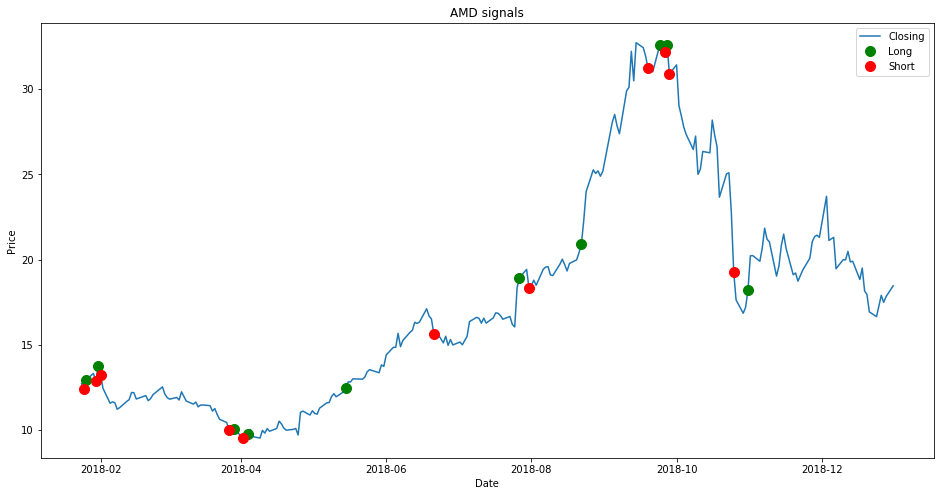

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['Adj Close'], label='Closing')
plt.plot(sells.index, df.ix[sells.index]['Adj Close'],'go', markersize=10, color='g', label='Long')
plt.plot(buys.index, df.ix[buys.index]['Adj Close'], 'ro', markersize=10, color='r', label='Short')
plt.title(symbol + ' signals')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()

## RSI Subplots

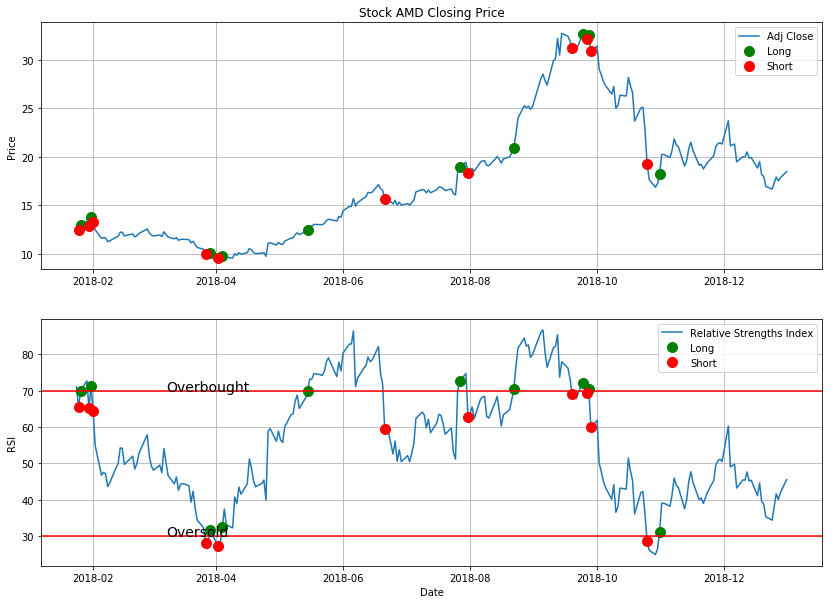

In [11]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.plot(sells.index, df.ix[sells.index]['Adj Close'],'go', markersize=10, color='g', label='Long')
ax1.plot(buys.index, df.ix[buys.index]['Adj Close'], 'ro', markersize=10, color='r', label='Short')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'], label='Relative Strengths Index')
ax2.text(s='Overbought', x=df.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=30, fontsize=14)
ax2.plot(sells.index, df.ix[sells.index]['RSI'],'go', markersize=10, color='g', label='Long')
ax2.plot(buys.index, df.ix[buys.index]['RSI'], 'ro', markersize=10, color='r', label='Short')
ax2.axhline(y=70, color='red')
ax2.axhline(y=30, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend()